In [1]:
from funcs import eval_snn
from Models import modelpool
from Preprocess import datapool
from utils import replace_maxpool2d_with_avgpool2d, replace_qcfs_with_sn, replace_relu_with_qcfs
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_names = ['resnet20', 'vgg16']
data_names = ['cifar10', 'cifar100']
snn_models = ['if', 'gn', 'pgn']
BS = 128
L = 8
T = L * 4
TAU = 4

In [3]:
def sim(model_name: str, data_name: str, sn_type: str):
	loss_fn = nn.CrossEntropyLoss()
	_, test = datapool(data_name, BS)
	model = modelpool(model_name, data_name)
	model = replace_maxpool2d_with_avgpool2d(model)
	model = replace_relu_with_qcfs(model, L)
	model.load_state_dict(torch.load('./saved_models/' + model_name + '-' + data_name + '.pth', weights_only=True))
	model = replace_qcfs_with_sn(model, members=TAU, sn_type=sn_type)
	model.to(device)
	acc, loss = eval_snn(test, model, loss_fn, device, T)
	return acc, loss

In [4]:
all_data = {}
for model_name in model_names:
	all_data[model_name] = {}
	for data_name in data_names:
		all_data[model_name][data_name] = {}
		for snn_model in snn_models:
			print(model_name, data_name, snn_model)
			acc, loss = sim(model_name, data_name, snn_model)
			all_data[model_name][data_name][snn_model] = (acc, loss)

resnet20 cifar10 if
Files already downloaded and verified
Files already downloaded and verified
resnet20 cifar10 gn
Files already downloaded and verified
Files already downloaded and verified
resnet20 cifar10 pgn
Files already downloaded and verified
Files already downloaded and verified
resnet20 cifar100 if
Files already downloaded and verified
Files already downloaded and verified
resnet20 cifar100 gn
Files already downloaded and verified
Files already downloaded and verified
resnet20 cifar100 pgn
Files already downloaded and verified
Files already downloaded and verified
vgg16 cifar10 if
Files already downloaded and verified
Files already downloaded and verified
vgg16 cifar10 gn
Files already downloaded and verified
Files already downloaded and verified
vgg16 cifar10 pgn
Files already downloaded and verified
Files already downloaded and verified
vgg16 cifar100 if
Files already downloaded and verified
Files already downloaded and verified
vgg16 cifar100 gn
Files already downloaded an

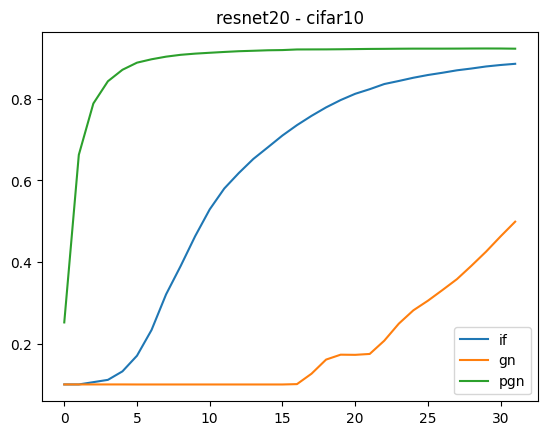

In [5]:
import matplotlib.pyplot as plt
model_name = 'resnet20'
data_name = 'cifar10'
plt.figure()
plt.title(f'{model_name} - {data_name}')
for snn_model in snn_models:
    acc, loss = all_data[model_name][data_name][snn_model]
    plt.plot(acc, label=snn_model)
plt.legend();